<a href="https://colab.research.google.com/github/zitoyeo/EDA-Modeling/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 06 : 따릉이
서울 열린데이터 광장에서 제공하는 서울시 공공자전거 이용현황 데이터

- **Data1 : 서울특별시 공공자전거 대여소 정보**
  서울특별시 공공자전거 대여소 정보
  서울특별시 공공자전거 대여소(따릉이) 현황 정보이다.
  **대여소의 이름, 관리번호, 위치정보와, 거치대수 정보**를 제공

- **Data2 : 서울특별시 공공자전거 대여소별 이용정보(월별)**
  서울특별시 공공자전거 대여소별 대여,반납정보.
  **년월, 대여소번소, 대여소명, 대여건수, 반납건수 정보를 제공한다.**
  (Data2의 경우, 대여소 그룹 컬럼을 제거한 것을 활용)

- **Data 3 : 서울특별시 공공자전거 이용정보(시간대별)**
  서울 특별시 공공자전거 시간대별 이용정보이다.
  **대여일시, 대여시간, 대여소번호, 대여소명, 정기권유무, 성별, 연령대, 탄소량, 이동거리, 이동시간 정보**를 제공한다.

이용건수 : 해당 시간대에 대여한 건수의합
**그룹명 없음, 대여소명 없음, 정비센터 등인 경우 테스트 및 정비목적이므로 분석에 제외**하여 활용할 것

- Data from : 서울 열린데이터 광장

# 1. 데이터 둘러보기


In [1]:
# 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib


#런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,882 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [2]:
# 기본패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
sns.set(font_scale=1)
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

# 경고문 안뜨게 하고 출력문 깔끔하게 하기

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#구글 드라이브 마운트하기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 불러오기
# encoding='cp949'는 Windows에서 생성된 한글 텍스트 파일(CSV 등)을 Python에서 읽기 위해 사용하는 인코딩 설정이다.
bike1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/공공자전거 대여소 정보(21.01.31 기준).csv', encoding='cp949')
bike2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/공공자전거 대여소별 이용정보_2020.07_2021.01.csv', encoding = 'cp949')
bike3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/공공자전거 이용정보(시간대별)_21.01.csv', encoding = 'cp949')

In [5]:
# 데이터 확인하기
bike1.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수_LCD,거치대수_QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [6]:
# 데이터 기본 정보 확인하기
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소
번호     2154 non-null   int64  
 1   보관소(대여소)명  2154 non-null   object 
 2   자치구        2154 non-null   object 
 3   상세주소       2154 non-null   object 
 4   위도         2042 non-null   float64
 5   경도         2042 non-null   float64
 6   설치
시기      2152 non-null   object 
 7   거치대수_LCD   1482 non-null   float64
 8   거치대수_QR    671 non-null    float64
 9   운영
방식      2154 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 168.4+ KB


In [7]:
# 기본 통계량 확인하기
bike1.describe()

,대여소\n번호,위도,경도,거치대수_LCD,거치대수_QR
count,2154.000000,2042.000000,2042.000000,1482.000000,671.000000
mean,1613.504643,37.548125,126.989775,12.699055,13.180328
std,1051.699853,0.051829,0.088977,4.735529,5.078662
min,101.000000,37.430977,126.798599,5.000000,5.000000
25%,744.250000,37.505814,126.917050,10.000000,10.000000
50%,1445.500000,37.547921,127.001419,10.000000,10.000000
75%,2309.750000,37.577998,127.058075,15.000000,15.000000
max,4791.000000,37.689720,127.180267,40.000000,40.000000


In [8]:
# 데이터 타입 object인거 확인하기
bike1.describe(include='object')


,보관소(대여소)명,자치구,상세주소,설치\n시기,운영\n방식
count,2154,2154,2154,2152,2154
unique,2152,25,2074,277,2
top,청계천 생태교실 앞,강서구,서울특별시 송파구 법원로 101,2017-11-01,LCD
freq,2,152,5,171,1482


In [9]:
bike2.describe(include='object')

,대여소 명
count,14754
unique,2229
top,2301. 현대고등학교 건너편
freq,7


In [10]:
bike3.describe(include='object')

,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,718857,718857,718857,401235,718857,718857,718857
unique,30,2188,4,4,7,51422,1333
top,2021-01-25,2102. 봉림교 교통섬,정기권,M,20대,0.00,0.00
freq,47304,1799,585211,262477,270097,73806,74193


# 데이터 보고 질문 만들기
- 이동거리 / 평균 사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는 ?
- 따릉이를 가장 많이 사용하는 성별은 ?
- 서울시 구별 설치 거치대의 개수는?
- 서울시 구별로 거치대 개수와 대여건수는?

# 3. 데이터 정비하기

## 3-1 컬럼명 바꾸기

In [11]:
bike1.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수_LCD,거치대수_QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [12]:
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

In [13]:
bike1.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [14]:
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도','설치시기', '거치대수lcd', '거치대수qr', '운영방식']

## 3-2 필요없는 컬럼제거하기

In [15]:
bike1 = bike1.drop(['상세주소','위도','경도'], axis=1, inplace=False)

In [16]:
bike1

# 2, 3은 제거할 만한 컬럼 없음!

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,NaN,LCD
...,...,...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),강동구,2020-01-13,NaN,20.0,QR
2150,1086,래미안 솔베뉴(구천면로),강동구,2020-01-10,NaN,10.0,QR
2151,1088,풍납사거리(강동),강동구,2020-01-14,NaN,12.0,QR
2152,1089,고덕 래미안힐스테이트(201동),강동구,2020-01-13,NaN,10.0,QR


## 3-3. NaN 값 처리하기

In [17]:
# LCD, QR 거치대 수에 NaN값은 0으로 처리하자
bike1['거치대수lcd'] = bike1['거치대수lcd'].fillna(0)
bike1['거치대수qr'] = bike1['거치대수qr'].fillna(0)

In [18]:
3

3

## 3-4 대여소명 바꾸기

In [19]:
# 대여소명에서 숫자 떼기
# 어떻게 ?
# 대여소명은 숫자 + , + 대여소 이름
bike3['대여소명_new']  = bike3['대여소명'].str.split(".", expand=True)[1]

In [20]:
#새컬럼 확인
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [21]:
#bike2에도 같은 작업

In [22]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [23]:
bike2['대여소번호'] = bike2['대여소 명'].str.split(".", expand=True)[0]
bike2['대여소명_new'] = bike2['대여소 명'].str.split(".", expand=True)[1]

In [24]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞


In [25]:
#bike2.drop('대여소aud_new', axis=1, inplace=True)

In [26]:
bike2

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞
...,...,...,...,...,...
14749,1474.서울중랑우체국,202101,315,1474,서울중랑우체국
14750,1477.면목삼익아파트 앞,202101,159,1477,면목삼익아파트 앞
14751,1478.홈플러스 상봉점 앞,202101,427,1478,홈플러스 상봉점 앞
14752,1479.면목 홈플러스 2,202101,187,1479,면목 홈플러스 2


In [27]:
# 정비센터는 대여소 번호가 없기 때문에 대여소 번호에 한글이 들어가는 경우가 발생한다.

bike2[bike2['대여소명_new'].isnull()]

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
1842,사대문센터,202007,2,사대문센터,None
1843,상담센터,202007,306,상담센터,None
1844,상암센터 정비실,202007,22,상암센터 정비실,None
1845,위트콤,202007,266,위트콤,None
1846,중랑센터,202007,14,중랑센터,None
1847,천왕센터,202007,3,천왕센터,None
1848,천호센터,202007,1,천호센터,None
2077,대여소명 없음,202008,0,대여소명 없음,None
3921,사대문센터,202008,1,사대문센터,None
3922,상담센터,202008,46,상담센터,None


In [28]:
# 분석에서 제외하기 위해 drop 시켜 주자

bike22 = bike2.dropna(subset=['대여소명_new'])

In [29]:
bike22

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞
...,...,...,...,...,...
14749,1474.서울중랑우체국,202101,315,1474,서울중랑우체국
14750,1477.면목삼익아파트 앞,202101,159,1477,면목삼익아파트 앞
14751,1478.홈플러스 상봉점 앞,202101,427,1478,홈플러스 상봉점 앞
14752,1479.면목 홈플러스 2,202101,187,1479,면목 홈플러스 2


## 3-5 성별 정리하기

In [30]:
bike3.head(30)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞
5,2021-01-01,0,192,192. 연서어린이공원,정기권,NaN,~10대,1,23.40,0.21,908.98,7,연서어린이공원
6,2021-01-01,0,1118,1118. 증미역 3번출구뒤(등촌두산위브센티움오피스텔),정기권,NaN,~10대,1,80.64,0.75,3232.27,18,증미역 3번출구뒤(등촌두산위브센티움오피스텔)
7,2021-01-01,0,1936,1936. 개봉역 1번 출구 자전거보관서쪽,정기권,NaN,~10대,1,91.38,0.82,3549.96,33,개봉역 1번 출구 자전거보관서쪽
8,2021-01-01,0,1038,1038. 강일 다솜 어린이 공원,정기권,NaN,20대,1,0.00,0.00,0.00,11,강일 다솜 어린이 공원
9,2021-01-01,0,1157,1157. 강서구청,정기권,NaN,20대,1,57.36,0.58,2497.24,17,강서구청


In [31]:
#성별 컬럼에 대소문자 , Nan이 섞여있다.
# unique를 통해 구성확인하기
print('성별 : ', bike3['성별'].unique())

성별 :  [nan 'F' 'M' 'f' 'm']


In [32]:
# 성별 카테고리 정리하기
# (bike3['성별'] == 'f') 조건식 평가하면서 True False 반환
#bike3['성별']: 성별 열의 시리즈를 가져옵니다.
#(bike3['성별'] == 'f'): 조건을 평가하여 True/False 값의 시리즈를 생성합니다.
#bike3['성별'][(조건)]: 조건이 True인 값만 선택합니다.

bike3['성별'][(bike3['성별'] == 'f')] = 'F'
bike3['성별'][(bike3['성별'] == 'm')] = 'M'
print('성별 : ', bike3['성별'].unique())

##Nan 값은 어떻게 처리 ?
# 의미있는 다른 값으로 변경하기가 어렵고, 다른 값으로 변경해서 데이터 처리가 편해질 것 같지 않다.

성별 :  [nan 'F' 'M']


<ipython-input-32-cdd9f8e74f2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['성별'][(bike3['성별'] == 'f')] = 'F'
<ipython-input-32-cdd9f8e74f2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['성별'][(bike3['성별'] == 'm')] = 'M'


## 3-6 컬럼의 데이터 타입 변환하기

In [33]:
# 대여소번호 데이터타입을 object로 바꾸기

In [34]:
print(bike1['대여소번호'].dtype)

int64


In [35]:
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

In [36]:
# 운동량 , 탄소량 데이터 타입을 numeric으로 바꾸자.

print(bike3['운동량'].dtypes)
print(bike3['탄소량'].dtypes)


object
object


In [37]:
bike3

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219,여의나루역 1번출구 앞
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133,건영아파트 앞
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90,초원아파트 앞
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20,증산2교


In [40]:
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = pd.to_numeric(bike3['탄소량'])

In [39]:
# 운동량 데이터에 이상값 존재
# VlueError  Unable to parse string "\N" at position 57

bike3.loc[bike3['운동량'] == r'\N', '운동량'] = -1
bike3.loc[bike3['탄소량'] == r'\N', '탄소량'] = -1


# '\'와 같은 특수문자가 포함되는 경우 unicode error가 발생한다. 이 때는 따옴표 앞에 r을 써준다.

In [41]:
bike3

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219,여의나루역 1번출구 앞
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133,건영아파트 앞
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90,초원아파트 앞
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20,증산2교


In [42]:
print(bike3['운동량'].dtype)
print(bike3['탄소량'].dtype)

float64
float64


In [43]:
# 대여일자는 날짜 타입으로 데이터 타입을 변경해준다.
# 날자 타입은 연,월,일,시,분,초, 요일 등의 정보를 보기편하다.

bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])


In [44]:
print(bike3['대여일자'])

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
718852   2021-01-31
718853   2021-01-31
718854   2021-01-31
718855   2021-01-31
718856   2021-01-31
Name: 대여일자, Length: 718857, dtype: datetime64[ns]


## 3. 데이터 분석하기

### 3-1 간단한 분석

In [45]:
## 이동거리(평균)가 큰 순서대로 대여소 명 뽑아보기

bike3.groupby(['대여소명_new'])['이동거리'].mean().reset_index().sort_values(by='이동거리', ascending=False).head(3)

,대여소명_new,이동거리
887,석수역1번출구 앞 (SK주유소),9621.651079
439,독산보도육교 앞 자전거 보관소,9151.768862
1187,옥수역 3번출구,8606.456614


In [46]:
# 평균사용시간이 높은 상위 대여소
bike3.groupby(['대여소명_new'])['사용시간'].mean().reset_index().sort_values(by='사용시간', ascending=False).head(3)

,대여소명_new,사용시간
1654,IBK기업은행 석수역 지점 앞,81.609756
1123,여의도중학교 옆,74.242489
1118,여의나루역 1번출구 앞,70.088000


## 운동량과 이동거리의 상관관계

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

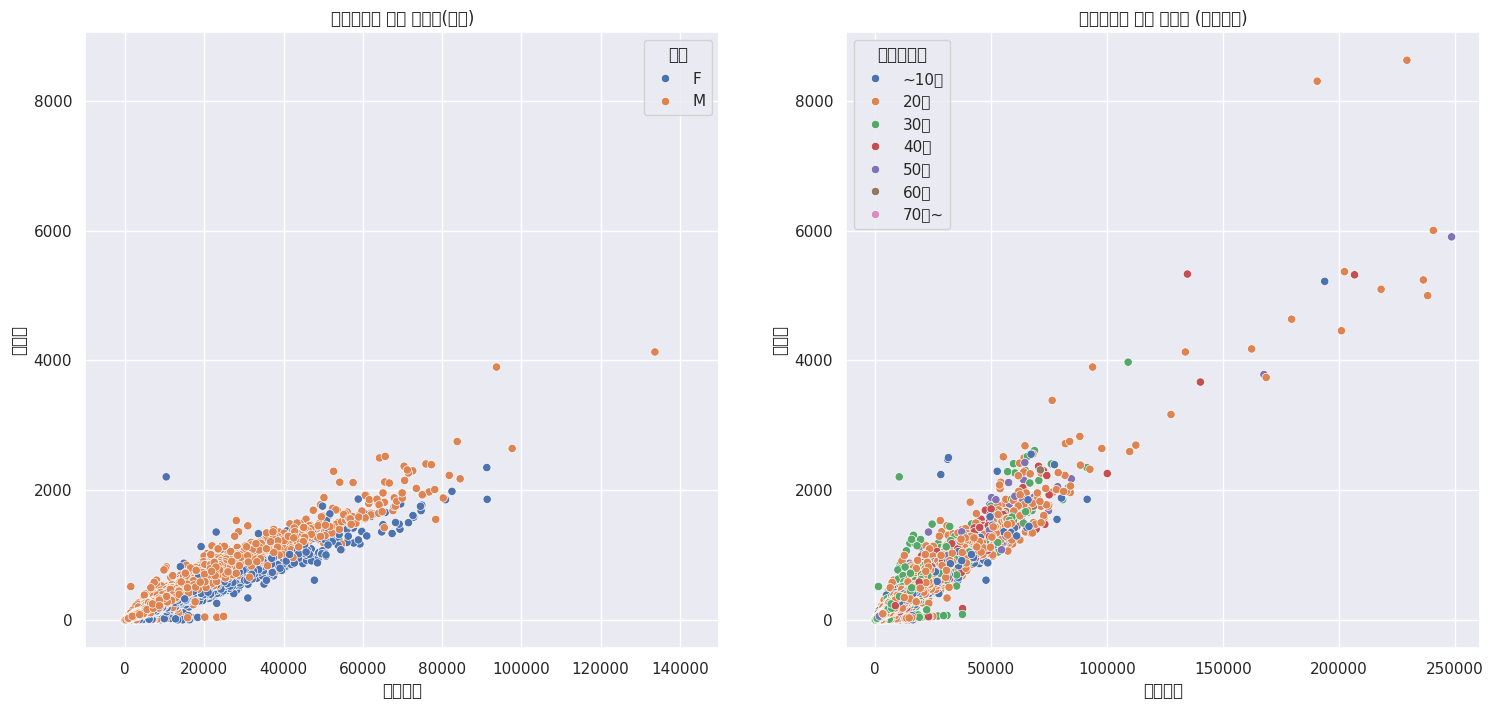

In [47]:
# 운동량과 이동거리의 상관관계
# 데이터를 좀 더 잘 보이게 그림을 다시 그리자

f, ax = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')
ax[0].set_xlim(-10000,150000)
ax[0].set_title('이동거리에 따른 운동량(성별)')
sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[1], hue='연령대코드')
ax[1].set_title('이동거리에 따른 운동량 (연령대별)')
plt.show()

## 3-3 대여일자에 따른 남녀 대여건수 비교

In [48]:
# 대여일자 데이터를 년/월/일로 나누기
bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [49]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여년,대여월,대여일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞,2021,1,1
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞,2021,1,1
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞,2021,1,1
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구,2021,1,1
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞,2021,1,1


In [50]:
#성별에 따른 사용시간 합계를 대여일별로 집계하기
bike3.pivot_table(index=bike3['대여일'], columns = bike3['성별'], values='사용시간', aggfunc=sum)

성별,F,M
대여일,,
1,154530,234399
2,153598,234173
3,131245,217678
4,156668,267946
5,122408,222853
6,95435,166657
7,15144,45589
8,23995,66331
9,31465,82345


<Axes: title={'center': '일별 자전거 대여수'}, xlabel='대여일'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) m

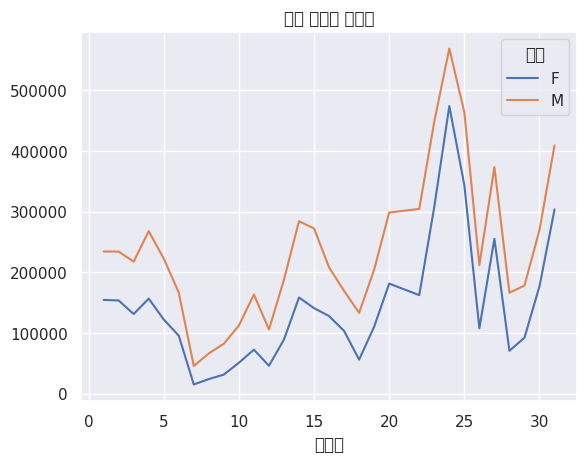

In [51]:
#위 정보를 바탕으로 대여 일별 성별에 따른 사용시간 그래프를 그려보자

bike_fm = bike3.pivot_table(index=bike3['대여일'], columns=bike3['성별'], values='사용시간', aggfunc=sum)
bike_fm.plot(title='일별 자전거 대여수', rot=0)

## 3-4. 구별 거치대 개수 지도로 나타내기

In [52]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD


In [53]:
# LCD 거치대와 QR 거치대수 합한 새 컬럼 만들기
bike1['총거치대수'] = bike1['거치대수qr']+bike1['거치대수lcd']

In [54]:
bike1

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0
...,...,...,...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),강동구,2020-01-13,0.0,20.0,QR,20.0
2150,1086,래미안 솔베뉴(구천면로),강동구,2020-01-10,0.0,10.0,QR,10.0
2151,1088,풍납사거리(강동),강동구,2020-01-14,0.0,12.0,QR,12.0
2152,1089,고덕 래미안힐스테이트(201동),강동구,2020-01-13,0.0,10.0,QR,10.0


In [55]:
# 구별 설치 거치대의 개수

bike_sum1 = bike1.groupby(['자치구'])[('총거치대수')].sum().reset_index()
bike_sum1 = bike_sum1.set_index('자치구')
bike_sum1.index


Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [56]:
# folium으로 서울 지도위에 대여소 분포 나타내기
# folium: 지도 위에 시각화 할때 유용함.

import json
import folium
import warnings

geo_path ='/content/drive/MyDrive/Colab Notebooks/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [57]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '39020',
    'name': '서귀포시',
    'name_eng': 'Seogwipo-si',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[126.1701670531016, 33.27833920373795],
      [126.17796199822318, 33.28904450342792],
      [126.20366562455006, 33.292582069125935],
      [126.23227804627976, 33.28054651709448],
      [126.27081469983565, 33.29305651947374],
      [126.28692516789717, 33.3095121006344],
      [126.32582807936741, 33.32307849544494],
      [126.33863040850332, 33.33700002289742],
      [126.37692773779688, 33.34348978209229],
      [126.42008790072302, 33.33448285889923],
      [126.43967991919219, 33.34042205120408],
      [126.44742456956253, 33.35529267692266],
      [126.4918716225209, 33.351283204155564],
      [126.54001194569452, 33.35949354681064],
      [126.55310458705854, 33.368769331336765],
      [126.5830715764017, 33.368027779973275],
      [126.65655971322

## 3-5. 구별 대여건수 지도로 나타내기

In [58]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여소번호    2154 non-null   object 
 1   대여소명     2154 non-null   object 
 2   자치구      2154 non-null   object 
 3   설치시기     2152 non-null   object 
 4   거치대수lcd  2154 non-null   float64
 5   거치대수qr   2154 non-null   float64
 6   운영방식     2154 non-null   object 
 7   총거치대수    2154 non-null   float64
dtypes: float64(3), object(5)
memory usage: 134.8+ KB


In [59]:
# 대여소 번호 타입 변경하기
bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])

<ipython-input-59-e4322c8a928e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])


In [60]:
print(bike22['대여소번호'].dtype)

int64


In [62]:
bike1

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0
...,...,...,...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),강동구,2020-01-13,0.0,20.0,QR,20.0
2150,1086,래미안 솔베뉴(구천면로),강동구,2020-01-10,0.0,10.0,QR,10.0
2151,1088,풍납사거리(강동),강동구,2020-01-14,0.0,12.0,QR,12.0
2152,1089,고덕 래미안힐스테이트(201동),강동구,2020-01-13,0.0,10.0,QR,10.0


In [63]:
# 대여소명에 구 붙이기
# merge (inner join 수행) 대여소 번호가 같은거 까리 병합
bike_merge = pd.merge(bike1, bike22, left_on = '대여소번호', right_on = '대여소번호')

In [64]:
bike_merge.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수,대여소 명,대여 일자 / 월,대여 건수,대여소명_new
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202007,1556,경복궁역 7번출구 앞
1,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202008,997,경복궁역 7번출구 앞
2,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202009,1338,경복궁역 7번출구 앞
3,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202010,1478,경복궁역 7번출구 앞
4,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202011,1072,경복궁역 7번출구 앞


In [65]:
# 필요한 컬럼만 남기기
bike_merge = bike_merge.drop(['설치시기', '대여소 명'], axis=1, inplace=False)

In [66]:
bike_merge

,대여소번호,대여소명,자치구,거치대수lcd,거치대수qr,운영방식,총거치대수,대여 일자 / 월,대여 건수,대여소명_new
0,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202007,1556,경복궁역 7번출구 앞
1,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202008,997,경복궁역 7번출구 앞
2,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202009,1338,경복궁역 7번출구 앞
3,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202010,1478,경복궁역 7번출구 앞
4,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202011,1072,경복궁역 7번출구 앞
...,...,...,...,...,...,...,...,...,...,...
14567,1090,상일동역 2번출구 앞,강동구,0.0,10.0,QR,10.0,202009,2419,상일동역 2번출구 앞
14568,1090,상일동역 2번출구 앞,강동구,0.0,10.0,QR,10.0,202010,2459,상일동역 2번출구 앞
14569,1090,상일동역 2번출구 앞,강동구,0.0,10.0,QR,10.0,202011,1512,상일동역 2번출구 앞
14570,1090,상일동역 2번출구 앞,강동구,0.0,10.0,QR,10.0,202012,1001,상일동역 2번출구 앞


In [67]:
#202101 데이터만 사용하기
bike_merge01 = bike_merge[bike_merge['대여 일자 / 월'] == 202101]

In [68]:
bike_merge01.head(5)

,대여소번호,대여소명,자치구,거치대수lcd,거치대수qr,운영방식,총거치대수,대여 일자 / 월,대여 건수,대여소명_new
6,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202101,417,경복궁역 7번출구 앞
13,302,경복궁역 4번출구 뒤,종로구,12.0,0.0,LCD,12.0,202101,714,경복궁역 4번출구 뒤
20,303,광화문역 1번출구 앞,종로구,8.0,0.0,LCD,8.0,202101,590,광화문역 1번출구 앞
27,304,광화문역 2번출구 앞,종로구,0.0,7.0,QR,7.0,202101,393,광화문역 2번출구 앞
34,305,종로구청 옆,종로구,16.0,0.0,LCD,16.0,202101,514,종로구청 옆


In [70]:
# 자치구별 대여건수, 반납건수 집계하기
bike_sum2 = bike_merge01.groupby(['자치구'])[('대여 건수')].sum().reset_index()
bike_sum2 = bike_sum2.set_index('자치구')

In [79]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

folium.Choropleth(
    geo_data= geo_str,  # GeoJSON 파일 경로 또는 데이터
    data=bike_sum2['대여 건수'],
    columns= [bike_sum2.index, bike_sum2['대여 건수']],
    key_on='feature.properties.name',  # GeoJSON의 키 (프로퍼티 이름)
    fill_color='YlGn',  # 색상
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Legend Title'
).add_to(m)


seoul_bike2